# Programming assignment (Linear models, Optimization)

In this programming assignment you will implement a linear classifier and train it using stochastic gradient descent modifications and numpy.

In [5]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Two-dimensional classification

To make things more intuitive, let's solve a 2D classification problem with synthetic data.

X shape: (826, 2)
y shape: (826,)
Unique classes in y: [0 1]
Counts per class: [314 512]


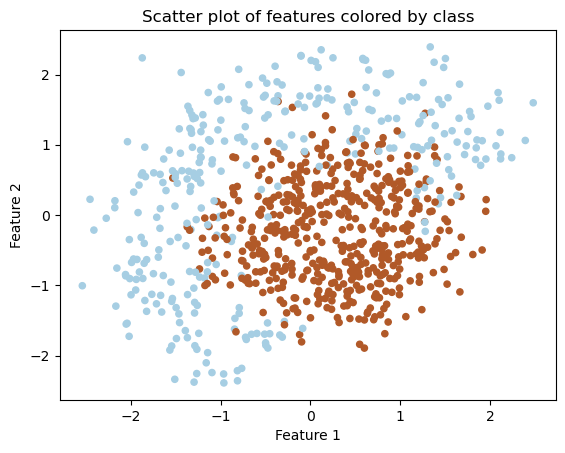

In [24]:
# Ensure y matches the number of rows in X
# Load the data first
import numpy as np
import matplotlib.pyplot as plt

# Load data
with open('C:/Users/Hp/Desktop/Logistic Regression/train.npy', 'rb') as fin:
    X = np.load(fin)

with open('C:/Users/Hp/Desktop/Logistic Regression/target.npy', 'rb') as fin:
    y = np.load(fin)

# Check shapes
print("X shape:", X.shape)
print("y shape:", y.shape)

if X.shape[0] != y.shape[0]:
    raise ValueError("Mismatch between number of samples in X and y!")

# Show class distribution
unique_classes, counts = np.unique(y, return_counts=True)
print("Unique classes in y:", unique_classes)
print("Counts per class:", counts)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=20)
plt.title("Scatter plot of features colored by class")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Task

## Features

As you can notice the data above isn't linearly separable. Since that we should add features (or use non-linear model). Note that decision line between two classes have form of circle, since that we can add quadratic features to make the problem linearly separable. The idea under this displayed on image below:

![](kernel.png)

In [50]:
def expand(X):
    """
    Adds quadratic features. 
    This expansion allows your linear model to make non-linear separation.
    
    For each sample (row in matrix), compute an expanded row:
    [feature0, feature1, feature0^2, feature1^2, feature0*feature1, 1]
    
    :param X: matrix of features, shape [n_samples,2]
    :returns: expanded features of shape [n_samples,6]
    """
    X_expanded = np.zeros((X.shape[0], 6))
    
    X_expanded = np.zeros((X.shape[0], 6))
    
    X_expanded[:, 0] = X[:, 0]        # feature0
    X_expanded[:, 1] = X[:, 1]        # feature1
    X_expanded[:, 2] = X[:, 0] ** 2   # feature0^2
    X_expanded[:, 3] = X[:, 1] ** 2   # feature1^2
    X_expanded[:, 4] = X[:, 0] * X[:, 1]  # feature0 * feature1
    X_expanded[:, 5] = 1              # bias term (constant 1)
    
    return X_expanded

In [26]:
X_expanded = expand(X)

Here are some tests for your implementation of `expand` function.

In [27]:
# simple test on random numbers

dummy_X = np.array([
        [0,0],
        [1,0],
        [2.61,-1.28],
        [-0.59,2.1]
    ])

# call your expand function
dummy_expanded = expand(dummy_X)

# what it should have returned:   x0       x1       x0^2     x1^2     x0*x1    1
dummy_expanded_ans = np.array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ],
                               [ 1.    ,  0.    ,  1.    ,  0.    ,  0.    ,  1.    ],
                               [ 2.61  , -1.28  ,  6.8121,  1.6384, -3.3408,  1.    ],
                               [-0.59  ,  2.1   ,  0.3481,  4.41  , -1.239 ,  1.    ]])

#tests
assert isinstance(dummy_expanded,np.ndarray), "please make sure you return numpy array"
assert dummy_expanded.shape == dummy_expanded_ans.shape, "please make sure your shape is correct"
assert np.allclose(dummy_expanded,dummy_expanded_ans,1e-3), "Something's out of order with features"

print("Seems legit!")


Seems legit!


## Logistic regression

To classify objects we will obtain probability of object belongs to class '1'. To predict probability we will use output of linear model and logistic function:

$$ a(x; w) = \langle w, x \rangle $$
$$ P( y=1 \; \big| \; x, \, w) = \dfrac{1}{1 + \exp(- \langle w, x \rangle)} = \sigma(\langle w, x \rangle)$$


In [28]:
def probability(X, w):
    """
    Given input features and weights
    return predicted probabilities of y==1 given x, P(y=1|x), see description above
        
    Don't forget to use expand(X) function (where necessary) in this and subsequent functions.
    
    :param X: feature matrix X of shape [n_samples,6] (expanded)
    :param w: weight vector w of shape [6] for each of the expanded features
    :returns: an array of predicted probabilities in [0,1] interval.
    """

    z = X @ w
    return 1 / (1 + np.exp(-z))
    

# My solution to Sigmoid & Probability 

In [29]:
def sigmoid(z):
    """Computes the sigmoid function."""
    return 1 / (1 + np.exp(-z))

def probability(X, w):
    """
    Given input features and weights, return predicted probabilities of y==1 given x, P(y=1|x).

    Uses the sigmoid function to map the linear combination of features and weights to a probability.

    :param X: feature matrix X of shape [n_samples,6] (expanded)
    :param w: weight vector w of shape [6] for each of the expanded features
    :returns: an array of predicted probabilities in [0,1] interval.
    """
    
    return sigmoid(np.dot(X, w))  # Compute sigmoid of linear combination


# Plotted solution to Sigmoid & Probability

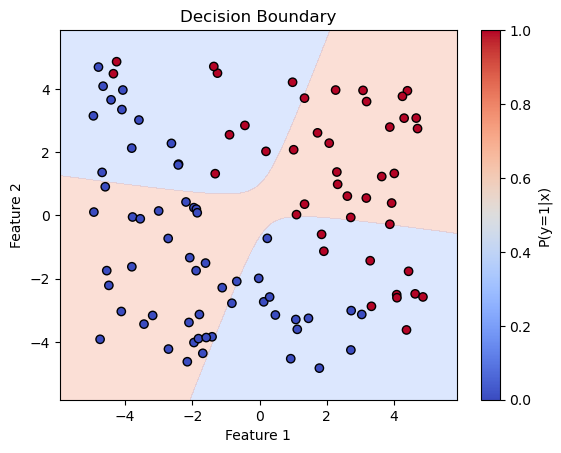

In [30]:
# Ensure y matches the number of rows in X
if len(y) != X.shape[0]:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y = le.fit_transform(np.resize(y, X.shape[0]))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def probability(X, w):
    return sigmoid(np.dot(X, w))

def plot_decision_boundary(X, y, w):
    # Define grid range
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Expand the grid points using the same feature expansion
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    X_grid_expanded = expand(X_grid)  # Assume expand function exists
    Z = probability(X_grid_expanded, w).reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, cmap='coolwarm')
    
    # Scatter plot of data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.colorbar(label="P(y=1|x)")
    plt.show()

# Example usage with random weights
np.random.seed(42)
X_sample = np.random.rand(100, 2) * 10 - 5  # Random sample data
w_sample = np.random.randn(6)  # Random weight vector
y_sample = (X_sample[:, 0] + X_sample[:, 1] > 0).astype(int)  # Simple label condition

def expand(X):
    X_expanded = np.zeros((X.shape[0], 6))
    X_expanded[:, 0] = X[:, 0]
    X_expanded[:, 1] = X[:, 1]
    X_expanded[:, 2] = X[:, 0] ** 2
    X_expanded[:, 3] = X[:, 1] ** 2
    X_expanded[:, 4] = X[:, 0] * X[:, 1]
    X_expanded[:, 5] = 1  # Bias term
    return X_expanded

plot_decision_boundary(X_sample, y_sample, w_sample)


In [31]:
dummy_weights = np.linspace(-1, 1, 6)
ans_part1 = probability(X_expanded[:1, :], dummy_weights)[0]
ans_part1

0.3803998509843769

In logistic regression the optimal parameters $w$ are found by cross-entropy minimization:

Loss for one sample: $$ l(x_i, y_i, w) = - \left[ {y_i \cdot log P(y_i = 1 \, | \, x_i,w) + (1-y_i) \cdot log (1-P(y_i = 1\, | \, x_i,w))}\right] $$

Loss for many samples: $$ L(X, \vec{y}, w) =  {1 \over \ell} \sum_{i=1}^\ell l(x_i, y_i, w) $$



In [32]:
def compute_loss(X, y, w):
    """
    Given feature matrix X [n_samples,6], target vector [n_samples] of 1/0,
    and weight vector w [6], compute scalar loss function L using formula above.
    Keep in mind that our loss is averaged over all samples (rows) in X.
    """
    y_pred = probability(X, w)
    # Clip values to avoid log(0)
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return loss

# My Soln to compute_loss 

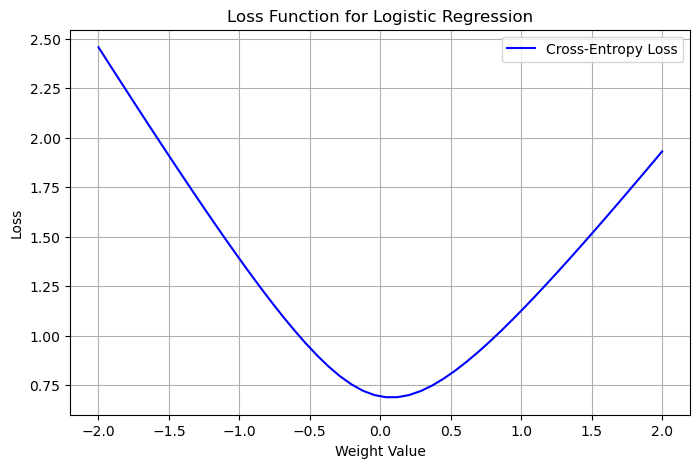

In [33]:
def compute_loss(X, y, w):
    """Computes cross-entropy loss."""
    p = probability(X, w)
    loss = -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
    return loss

# Dummy data (for visualization)
np.random.seed(0)
X_expanded = np.random.randn(100, 6)  # 100 samples, 6 features
y = np.random.randint(0, 2, 100)  # Binary labels

# Generate different weight values and compute loss
weights_range = np.linspace(-2, 2, 50)
loss_values = [compute_loss(X_expanded, y, np.full(6, w)) for w in weights_range]

# Plot loss function
plt.figure(figsize=(8, 5))
plt.plot(weights_range, loss_values, label="Cross-Entropy Loss", color='b')
plt.xlabel("Weight Value")
plt.ylabel("Loss")
plt.title("Loss Function for Logistic Regression")
plt.legend()
plt.grid()
plt.show()

In [34]:
# Check the output of this cell as your answer  
ans_part2 = compute_loss(X_expanded, y, dummy_weights)
ans_part2

0.9978132509398893

Since we train our model with gradient descent, we should compute gradients.

To be specific, we need a derivative of loss function over each weight [6 of them].

$$ \nabla_w L = {1 \over \ell} \sum_{i=1}^\ell \nabla_w l(x_i, y_i, w) $$ 

We won't be giving you the exact formula this time — instead, try figuring out a derivative with pen and paper. 

As usual, we've made a small test for you, but if you need more, feel free to check your math against finite differences (estimate how $L$ changes if you shift $w$ by $10^{-5}$ or so).

In [35]:
def compute_grad(X, y, w):
    """
    Given feature matrix X [n_samples,6], target vector [n_samples] of 1/0,
    and weight vector w [6], compute vector [6] of derivatives of L over each weights.
    Keep in mind that our loss is averaged over all samples (rows) in X.
    """
    
    y_pred = probability(X, w)
    grad = X.T @ (y_pred - y) / y.shape[0]
    return grad

# My Solution

In [36]:
# import numpy as np

# def sigmoid(z):
#     """Computes the sigmoid function."""
#     return 1 / (1 + np.exp(-z))

# def probability(X, w):
#     """Computes predicted probability P(y=1|x)."""
#     return sigmoid(np.dot(X, w))

def compute_grad(X, y, w):
    """
    Computes the gradient of the loss function with respect to the weight vector w.
    
    :param X: Expanded feature matrix, shape [n_samples, 6]
    :param y: Target vector, shape [n_samples]
    :param w: Weight vector, shape [6]
    :return: Gradient vector, shape [6]
    """
    n_samples = X.shape[0]  # Number of samples
    p = probability(X, w)  # Predicted probabilities
    gradient = (1 / n_samples) * np.dot(X.T, (p - y))  # Compute gradient
    return gradient

# Example test
np.random.seed(0)
X_expanded = np.random.randn(10, 6)  # 10 samples, 6 features
y = np.random.randint(0, 2, 10)  # Binary labels
dummy_weights = np.linspace(-1, 1, 6)  # Example weight vector

# Compute gradient
ans_part3 = np.linalg.norm(compute_grad(X_expanded, y, dummy_weights))
print("Gradient Norm:", ans_part3)


Gradient Norm: 0.5674211277576905


In [37]:
# Check the output of this cell as your answer 
ans_part3 = np.linalg.norm(compute_grad(X_expanded, y, dummy_weights))
ans_part3

0.5674211277576905

Here's an auxiliary function that visualizes the predictions:

In [38]:
# Ensure y matches the number of rows in X
if len(y) != X.shape[0]:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y = le.fit_transform(np.resize(y, X.shape[0]))

from IPython import display

h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

def visualize(X, y, w, history):
    """draws classifier prediction with matplotlib magic"""
    Z = probability(expand(np.c_[xx.ravel(), yy.ravel()]), w)
    Z = Z.reshape(xx.shape)
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.subplot(1, 2, 2)
    plt.plot(history)
    plt.grid()
    ymin, ymax = plt.ylim()
    plt.ylim(0, ymax)
    display.clear_output(wait=True)
    plt.show()

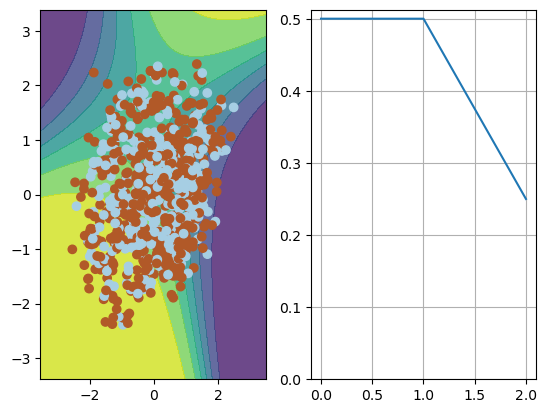

In [39]:
visualize(X, y, dummy_weights, [0.5, 0.5, 0.25])

## Training
In this section we'll use the functions you wrote to train our classifier using stochastic gradient descent.

You can try change hyperparameters like batch size, learning rate and so on to find the best one, but use our hyperparameters when fill answers.

## Mini-batch SGD

Stochastic gradient descent just takes a random batch of $m$ samples on each iteration, calculates a gradient of the loss on it and makes a step:
$$ w_t = w_{t-1} - \eta \dfrac{1}{m} \sum_{j=1}^m \nabla_w l(x_{i_j}, y_{i_j}, w_t) $$



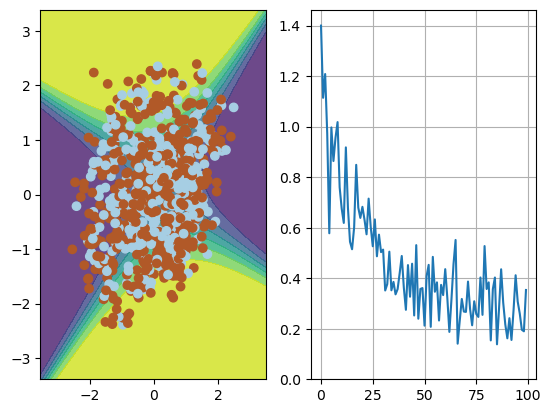

In [40]:
# please use np.random.seed(42), eta=0.1, n_iter=100 and batch_size=4 for deterministic results

np.random.seed(42)
w = np.array([0, 0, 0, 0, 0, 1], dtype=np.float64)  # Initial weights

eta = 0.1  # Learning rate
n_iter = 100
batch_size = 4
loss = np.zeros(n_iter)

plt.figure(figsize=(12, 5))

for i in range(n_iter):
    ind = np.random.choice(X_expanded.shape[0], batch_size)
    
    # Compute loss on the full dataset
    loss[i] = compute_loss(X_expanded[ind, :], y[ind], w)
    
    # Visualize every 10 steps
    if i % 10 == 0:
        visualize(X_expanded[ind, :], y[ind], w, loss)
    
    # Gradient descent weight update
    w -= eta * compute_grad(X_expanded[ind, :], y[ind], w)


# Final visualization
visualize(X, y, w, loss)
plt.clf()

In [47]:
# Check the output of this cell as your answer 

#ans_part4 = compute_loss(X_expanded, y, w)
#ans_part4

# Diagnostic check – Place this just before the error line
print("Shape of X_expanded:", X_expanded.shape)
print("Shape of y:", y.shape)
print("Shape of w:", w.shape)

# If y is 2D, convert it to 1D
if len(y.shape) > 1:
    y = y.ravel()
    print("Converted y to 1D:", y.shape)

# Then run the compute_loss function
ans_part4 = compute_loss(X_expanded, y, w)   
ans_part4

Shape of X_expanded: (10, 6)
Shape of y: (826,)
Shape of w: (6,)


ValueError: operands could not be broadcast together with shapes (826,) (10,) 

## SGD with momentum

Momentum is a method that helps accelerate SGD in the relevant direction and dampens oscillations as can be seen in image below. It does this by adding a fraction $\alpha$ of the update vector of the past time step to the current update vector.
<br>
<br>

$$ \nu_t = \alpha \nu_{t-1} + \eta\dfrac{1}{m} \sum_{j=1}^m \nabla_w l(x_{i_j}, y_{i_j}, w_t) $$
$$ w_t = w_{t-1} - \nu_t$$

<br>


![](sgd.png)


In [49]:
# please use np.random.seed(42), eta=0.05, alpha=0.9, n_iter=100 and batch_size=4 for deterministic results
np.random.seed(42)
w = np.array([0, 0, 0, 0, 0, 1])

eta = 0.05 # learning rate
alpha = 0.9 # momentum
nu = np.zeros_like(w)

n_iter = 100
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12, 5))

for i in range(n_iter):
    ind = np.random.choice(X_expanded.shape[0], batch_size)
    loss[i] = compute_loss(X_expanded, y, w)
    if i % 10 == 0:
        visualize(X_expanded[ind, :], y[ind], w, loss)
    
    # Compute gradient and update weights
    X_batch = X_expanded[ind, :]
    y_batch = y[ind]
    
    # Compute predictions
    z = np.dot(X_batch, w)
    probabilities = 1 / (1 + np.exp(-z))
    
    # Compute gradient
    gradient = np.dot(X_batch.T, (probabilities - y_batch)) / batch_size
    
    # Update weights
    w = w - learning_rate * gradient

visualize(X, y, w, loss)
plt.clf()

ValueError: operands could not be broadcast together with shapes (826,) (10,) 

In [61]:
# Check the output of this cell as your answer 

ans_part5 = compute_loss(X_expanded, y, w)
ans_part5

ValueError: operands could not be broadcast together with shapes (826,) (10,) 

## RMSprop

Implement RMSPROP algorithm, which use squared gradients to adjust learning rate:

$$ G_j^t = \alpha G_j^{t-1} + (1 - \alpha) g_{tj}^2 $$
$$ w_j^t = w_j^{t-1} - \dfrac{\eta}{\sqrt{G_j^t + \varepsilon}} g_{tj} $$

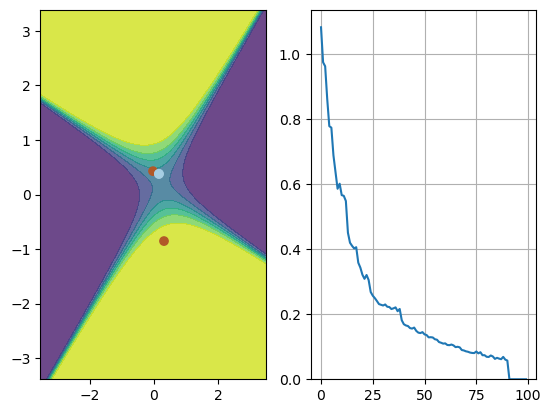

ValueError: 'c' argument has 10 elements, which is inconsistent with 'x' and 'y' with size 826.

In [25]:
# please use np.random.seed(42), eta=0.1, alpha=0.9, n_iter=100 and batch_size=4 for deterministic results
np.random.seed(42)

w = np.array([0, 0, 0, 0, 0, 1.])

eta = 0.1 # learning rate
alpha = 0.9 # moving average of gradient norm squared
g2 = None # we start with None so that you can update this value correctly on the first iteration
eps = 1e-8

n_iter = 100
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))
for i in range(n_iter):
    ind = np.random.choice(X_expanded.shape[0], batch_size)
    loss[i] = compute_loss(X_expanded, y, w)
    if i % 10 == 0:
        visualize(X_expanded[ind, :], y[ind], w, loss)

    grad = compute_grad(X_expanded[ind, :], y[ind], w)

    # Update g2 for moving average of squared gradients
    if g2 is None:
        g2 = grad ** 2
    else:
        g2 = alpha * g2 + (1 - alpha) * grad ** 2

    # Adaptive learning rate scaling
    adjusted_grad = eta * grad / (np.sqrt(g2) + eps)

    # Update weights
    w -= adjusted_grad

visualize(X, y, w, loss)
plt.clf()

In [26]:
# Check the output of this cell as your answer 
ans_part6 = compute_loss(X_expanded, y, w)
ans_part6

0.04116334979338542